# 딥러닝 - 신경망 모델 훈련
## 키워드 정리
- 드롭아웃
    - 은닉층에 있는 뉴런의 출력을 랜덤하게 꺼서 과대적합을 막는 기법입니다.
    - 드롭아웃은 훈련 중에 적용되며 평가나 예측에서는 적용하지 않습니다.
    - 텐서플로는 이를 자동으로 처리합니다.
- 콜백
    - 케라스 모델을 훈련하는 도중에 어떤 작업을 수행할 수 있도록 도와주는 도구입니다.
    - 대표적으로 최상의 모델을 자동으로 저장해 주거나 검증 점수가 더 이상 향상되지 않으면 일찍 종료할 수 있습니다.
- 조기 종료
    - 검증 점수가 더 이상 감소하지 않고 상승하여 과대적합이 일어나면 훈련을 계속 진행하지 않고 멈추는 기법입니다.
    - 이렇게 하면 계산 비용과 시간을 절약할 수 있습니다.

## 핵심 패키지와 함수

TensorFlow
- **Dropout**
    - 드롭아웃 층입니다.
    - 첫 번째 매개변수로 드롭아웃 할 비율(r)을 지정합니다.
    - 드롭아웃 하지 않는 뉴런의 출력은 1 / (1 - r)만큼 증가시켜 출력의 총합이 같도록 만듭니다.
- `save_weights()`는 모든 층의 가중치와 절편을 파일에 저장합니다.
    - 첫 번째 매개변수에 저장할 파일을 지정합니다.
    - save_format 매개변수에서 저장할 파일 포맷을 지정합니다. 기본적으로 텐서플로의 Checkpoint 포맷을 사용합니다. 이 매개변수를 "h5"로 지정하거나 파일의 확장자가 '.h5'이면 HDF5 포맷으로 저장됩니다.
- `load_weights()`는 모든 층의 가중치와 절편을 파일에 읽습니다.
    - 첫 번째 매개변수에 읽을 파일을 지정합니다.
- `save()`는 모델 구조와 모든 가중치와 절편을 파일에 저장합니다.
    - 첫 번째 매개변수에 저장할 파일을 지정합니다.
    - save_format 매개변수에서 저장할 파일 포맷을 지정합니다. 기본적으로 텐서플로의 SavedModel 포맷을 사용합니다. 이 - - - 매개변수를 'h5'로 지정하거나 파일의 확장자가 '.h5'이면 HDF5 포맷으로 저장됩니다.
- `load_model()`은 model.save()로 저장된 모델을 로드합니다.
    - 첫 번째 매개변수에 읽을 파일을 지정합니다.
    - ModelCheckPoint는 케라스 모델과 가중치를 일정 간격으로 저장합니다.
    - 첫 번째 매개변수에 저장할 파일을 지정합니다.
    - monitor 매개변수는 모니터링할 지표를 지정합니다. 기본값은 val_loss로 검증 손실을 관찰합니다.
    - save_weights_only 매개변수의 기본값은 False로 전체 모델을 저장합니다. True로 지정하면 모델의 가중치와 절편만 저장합니다.
    - save_best_only 매개변수를 True로 지정하면 가장 낮은 검증 점수를 만드는 모델을 저장합니다.
- `EarlyStopping`은 관심 지표가 더이상 향상하지 않으면 훈련을 중지합니다.
    - `monitor` 매개변수는 모니터링할 지표를 지정합니다. 기본값은 val_loss로 검증 손실을 관찰합니다.
    - `patience` 매개변수에 모델이 더 이상 향상되지 않고 지속할 수 있는 최대 에포크 횟수를 지정합니다.
    - `restore_best_weights` 매개변수에 최상의 모델 가중치를 복원할지 지정합니다. 기본값은 False입니다.

NumPy
- argmax는 배열에서 축을 따라 최대값의 인덱스를 반환합니다.
- axis 매개변수에서 어떤 축을 따라 최댓값을 찾을지 지정합니다. 기본값은 None으로 전체 배열에서 최대값을 찾습니다.

In [25]:
import keras

# Fashion MNist 데이터셋 가져오기
(train_input, train_target), (test_input, test_target) =\
     keras.datasets.fashion_mnist.load_data()

In [26]:
from sklearn.model_selection import train_test_split

# 정규화 (0~1)
train_scaled = train_input / 255.

# 훈련/검증 세트 분리
train_scaled, val_scaled, train_target, val_target = train_test_split(
    train_scaled, train_target, test_size=0.2, random_state=42
)

나중에 쉽게 은닉층을 추가할 수 있도록, 층을 구성하는 함수를 따로 정의하자!

In [27]:
# 층을 구성하는 함수
def mk_model(hidden_layers = None):
    model = keras.Sequential()
    model.add(keras.layers.Input(shape=(28, 28)))
    model.add(keras.layers.Flatten())
    model.add(keras.layers.Dense(100, activation='relu'))  # activation: 일직선인 그래프를 꺾어줌. 정확도를 높이기 위해 사용.

    if hidden_layers:
        model.add(hidden_layers)

    model.add(keras.layers.Dense(10, activation='softmax'))

    return model


In [ ]:
# 모델 생성
model = mk_model()
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_2 (Flatten)             │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 100)            │        78,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 10)             │         1,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 79,510 (310.59 KB)

 Trainable params: 79,510 (310.59 KB)

 Non-trainable params: 0 (0.00 B)

`model.fit()`의 옵션
- `verbose`
    - 0: 출력 X (기본값)
    - 1: 학습 진행률, accuracy, loss, epochs 출력
    - 2: accuracy, loss, epochs 출력

In [ ]:
# compile - 모델의 loss function, optimizer, 평가 지표 설정
model.compile(loss='sparse_categorical_crossentropy', metrics=['accuracy'])
m_history = model.fit(train_scaled, train_target, epochs=5)
m_history.history

Epoch 1/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 967us/step - accuracy: 0.7625 - loss: 0.6861
Epoch 2/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 1s 963us/step - accuracy: 0.8559 - loss: 0.4021
Epoch 3/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 1s 958us/step - accuracy: 0.8746 - loss: 0.3492
Epoch 4/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 1s 979us/step - accuracy: 0.8755 - loss: 0.3404
Epoch 5/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 1s 947us/step - accuracy: 0.8874 - loss: 0.3115


{'accuracy': [0.8118333220481873,
  0.8584166765213013,
  0.8730416893959045,
  0.8790624737739563,
  0.8863541483879089],
 'loss': [0.5354821085929871,
  0.3942241966724396,
  0.3541889786720276,
  0.3331749737262726,
  0.3147886395454407]}

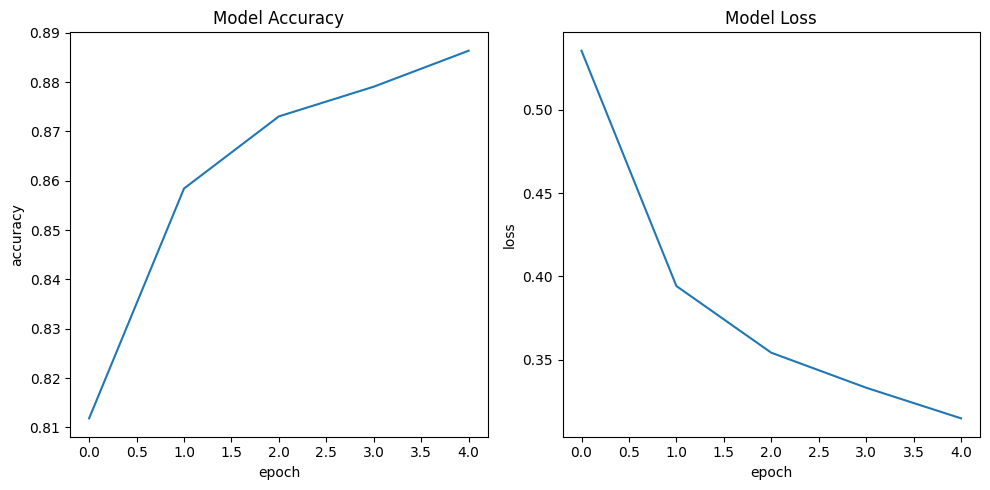

In [30]:
import matplotlib.pyplot as plt

# 5번의 학습에 따른 accuracy(정확도), loss(손실 함수) 그래프 출력
_, axs = plt.subplots(1, 2, figsize=(10, 5))

axs[0].plot(m_history.history['accuracy'])
axs[0].set_title('Model Accuracy')
axs[0].set_xlabel('epoch')
axs[0].set_ylabel('accuracy')

axs[1].plot(m_history.history['loss'])
axs[1].set_title('Model Loss')
axs[1].set_xlabel('epoch')
axs[1].set_ylabel('loss')

plt.tight_layout()  # 레이아웃 자동 조정
plt.show()

#### 검증 세트에 대한 손실을 알아보자!
- `fit()`의 옵션으로 검증 세트 출력 설정: `validation_data`
- 검증 세트의 손실이 항상 감소하기만 할까?

In [33]:
# 모델 생성
model = mk_model()

# 모델 설정 (loss, 점수 지표)
model.compile(loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# 모델 학습 (20번)
m_history = model.fit(train_scaled, train_target, epochs=20, validation_data=(val_scaled, val_target))

Epoch 1/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.7752 - loss: 0.6538 - val_accuracy: 0.8547 - val_loss: 0.4052
Epoch 2/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8525 - loss: 0.4053 - val_accuracy: 0.8625 - val_loss: 0.3776
Epoch 3/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8680 - loss: 0.3636 - val_accuracy: 0.8761 - val_loss: 0.3545
Epoch 4/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8796 - loss: 0.3305 - val_accuracy: 0.8808 - val_loss: 0.3443
Epoch 5/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8908 - loss: 0.3120 - val_accuracy: 0.8806 - val_loss: 0.3515
Epoch 6/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8916 - loss: 0.3054 - val_accuracy: 0.8746 - val_loss: 0.3653
Epoch 7/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8962 - loss: 0.2903 - val_accuracy: 0.8838 - val_loss: 0.3395
Epoch 8/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8965 - loss: 0.2811 - 

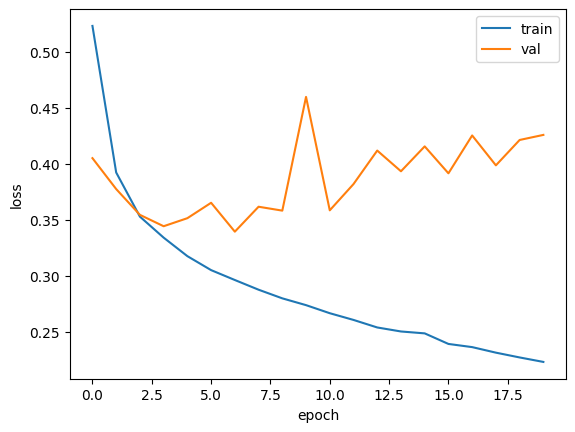

In [34]:
# 검증 세트의 loss 경향성 그래프 그리기
plt.plot(m_history.history['loss'], label='train')    # 훈련 세트의 loss
plt.plot(m_history.history['val_loss'], label='val')  # 검증 세트의 loss

plt.xlabel('epoch')
plt.ylabel('loss')

plt.legend()
plt.show()

검증 세트의 loss 값이 어느 순간 상승하면서 튀기도 한다...\
어떻게 해결할 수 있을까?

-> optimizer를 Adam으로 설정!

In [36]:
# 모델 생성
model = mk_model()

# adam 객체 생성
adam = keras.optimizers.Adam()  # learning_rate: 기본값 - 0.1

# 모델 설정 (optimizer(adam으로), loss, 점수 지표)
model.compile(optimizer=adam, loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# 모델 학습 (20번)
m_history = model.fit(train_scaled, train_target, epochs=20, validation_data=(val_scaled, val_target))

Epoch 1/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.7721 - loss: 0.6627 - val_accuracy: 0.8508 - val_loss: 0.4208
Epoch 2/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8544 - loss: 0.4022 - val_accuracy: 0.8673 - val_loss: 0.3754
Epoch 3/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8710 - loss: 0.3544 - val_accuracy: 0.8722 - val_loss: 0.3497
Epoch 4/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8792 - loss: 0.3259 - val_accuracy: 0.8789 - val_loss: 0.3362
Epoch 5/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8910 - loss: 0.2991 - val_accuracy: 0.8658 - val_loss: 0.3673
Epoch 6/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8926 - loss: 0.2869 - val_accuracy: 0.8788 - val_loss: 0.3404
Epoch 7/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9004 - loss: 0.2646 - val_accuracy: 0.8837 - val_loss: 0.3305
Epoch 8/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9048 - loss: 0.2592 - 

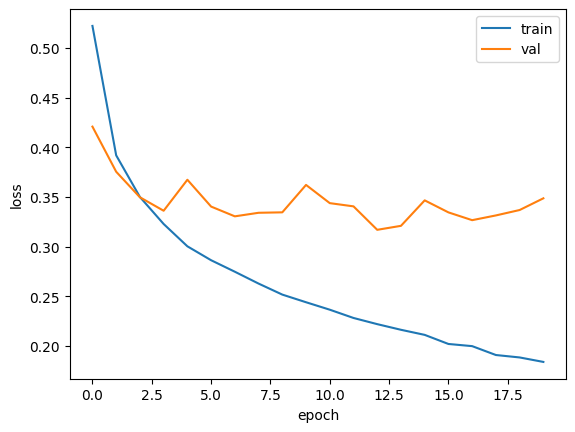

In [37]:
# 검증 세트의 loss 경향성 그래프 그리기
plt.plot(m_history.history['loss'], label='train')    # 훈련 세트의 loss
plt.plot(m_history.history['val_loss'], label='val')  # 검증 세트의 loss

plt.xlabel('epoch')
plt.ylabel('loss')

plt.legend()
plt.show()

adam을 사용하니까 훈련 세트의 loss도 0.2 미만으로 떨어지고, 검증 세트의 loss도 대체로 감소하는 경향성을 보인다.\
좀 더 개선할 수 없을까?

-> learning rate를 0.001로 줄이고, epochs를 50으로 올려보자!

In [38]:
# 모델 생성
model = mk_model()

# adam 객체 생성
adam = keras.optimizers.Adam(learning_rate=0.001)  # learning_rate: 0.001로 설정 (기본값 - 0.1)

# 모델 설정 (optimizer(adam으로), loss, 점수 지표)
model.compile(optimizer=adam, loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# 모델 학습 (20번)
m_history = model.fit(train_scaled, train_target, epochs=50, validation_data=(val_scaled, val_target))

Epoch 1/50
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.7673 - loss: 0.6700 - val_accuracy: 0.8407 - val_loss: 0.4588
Epoch 2/50
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8555 - loss: 0.3972 - val_accuracy: 0.8527 - val_loss: 0.3974
Epoch 3/50
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8709 - loss: 0.3533 - val_accuracy: 0.8568 - val_loss: 0.4002
Epoch 4/50
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8830 - loss: 0.3211 - val_accuracy: 0.8758 - val_loss: 0.3430
Epoch 5/50
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8907 - loss: 0.2993 - val_accuracy: 0.8762 - val_loss: 0.3397
Epoch 6/50
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8959 - loss: 0.2833 - val_accuracy: 0.8840 - val_loss: 0.3271
Epoch 7/50
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8992 - loss: 0.2733 - val_accuracy: 0.8838 - val_loss: 0.3275
Epoch 8/50
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9000 - loss: 0.2674 - 

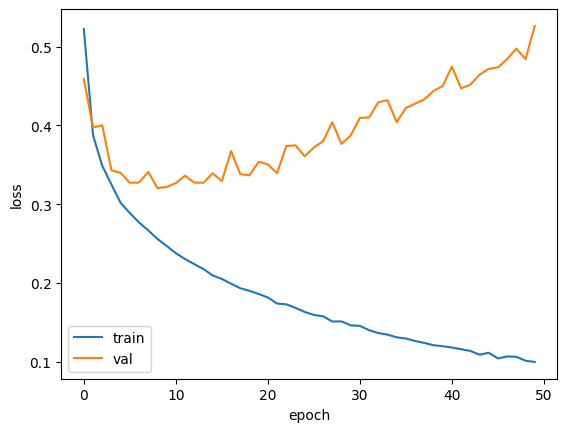

In [39]:
# 검증 세트의 loss 경향성 그래프 그리기
plt.plot(m_history.history['loss'], label='train')    # 훈련 세트의 loss
plt.plot(m_history.history['val_loss'], label='val')  # 검증 세트의 loss

plt.xlabel('epoch')
plt.ylabel('loss')

plt.legend()
plt.show()

검증 세트 loss 값의 상승하면 과대 적합이 일어나는 것이다.\
그 지점이 8 epochs인 듯하다.(1 ~ 7 epochs는 과소 적합)\
다만, 검증 세트의 loss값이 특정 시점부터 급격히 상승한다.\
더 개선할 수는 없을까?

-> **드롭아웃**: 설정된 비율만큼 은닉층에 있는 뉴런의 출력을 랜덤하게 꺼서 과대적합을 완화하는 기법 (보통 0.1 ~ 0.5로 설정)

In [40]:
# 모델 생성
model = mk_model(keras.layers.Dropout(0.3))  # 은닉층에 있는 뉴런의 30% 정도 출력을 끈다.
model.summary()  # 모델 구성 확인

Model: "sequential_8"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_8 (Flatten)             │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_16 (Dense)                │ (None, 100)            │        78,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 100)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_17 (Dense)                │ (None, 10)             │         1,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 79,510 (310.59 KB)

 Trainable params: 79,510 (310.59 KB)

 Non-trainable params: 0 (0.00 B)

비유) 예상문제 100문제 중에 30문제가 시험에 나온다. -> 어쨌든 공부는 다 해야 함.

In [41]:
# adam 객체 생성
adam = keras.optimizers.Adam(learning_rate=0.001)  # learning_rate: 0.001로 설정 (기본값 - 0.1)

# 모델 설정 (optimizer(adam으로), loss, 점수 지표)
model.compile(optimizer=adam, loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# 모델 학습 (20번)
m_history = model.fit(train_scaled, train_target, epochs=50, validation_data=(val_scaled, val_target))

Epoch 1/50
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.7392 - loss: 0.7501 - val_accuracy: 0.8403 - val_loss: 0.4331
Epoch 2/50
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8375 - loss: 0.4508 - val_accuracy: 0.8615 - val_loss: 0.3832
Epoch 3/50
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8558 - loss: 0.4037 - val_accuracy: 0.8668 - val_loss: 0.3642
Epoch 4/50
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8618 - loss: 0.3795 - val_accuracy: 0.8695 - val_loss: 0.3547
Epoch 5/50
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8683 - loss: 0.3579 - val_accuracy: 0.8752 - val_loss: 0.3424
Epoch 6/50
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8700 - loss: 0.3530 - val_accuracy: 0.8698 - val_loss: 0.3580
Epoch 7/50
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8715 - loss: 0.3433 - val_accuracy: 0.8734 - val_loss: 0.3400
Epoch 8/50
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8768 - loss: 0.3309 - 

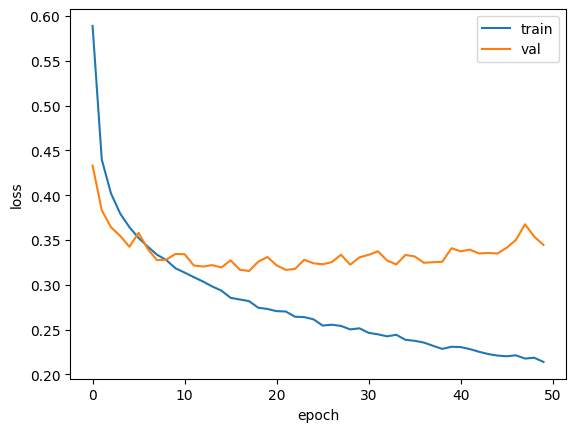

In [42]:
# 검증 세트의 loss 경향성 그래프 그리기
plt.plot(m_history.history['loss'], label='train')    # 훈련 세트의 loss
plt.plot(m_history.history['val_loss'], label='val')  # 검증 세트의 loss

plt.xlabel('epoch')
plt.ylabel('loss')

plt.legend()
plt.show()

검증 세트의 loss값이 상승하긴 하지만, 완만하게 상승한다.\
최저점은 17 epochs인 것 같다.\
(~17: 과소 적합 / 17~: 과대 적합)

이제 배포를 위해 모델을 저장해보자!

#### 모델 저장

- 모델 저장 방법
    1. 모델 저장 (확장자: `.keras`, `.h5`)
        - 장점: 바로 복원 가능 (fit 없이 predict 가능)
        - 단점: 상대적으로 용량이 큼
    2. 가중치 저장 (확장자: `.weights.h5`)
        - 장점: 용량이 작음 (성능에 영향을 덜 끼침)
        - 단점: 복구할 때 구조 재정의가 필요

In [44]:
# 모델 저장 (모델 구조 + 가중치 + 컴파일 설정) - model.save("파일명.keras")
model.save("model-whole.keras")

# 가중치 저장 - model.save_weights("파일명.weights.h5")
model.save_weights("model-weights.weights.h5")

저장된 모델을 불러와서 복구해보자!

In [47]:
# 가중치 파일로 모델 복구 - 원래 모델의 구조 재정의 필요!
model = mk_model(keras.layers.Dropout(0.3))
model.load_weights('model-weights.weights.h5')

In [48]:
import numpy as np

test_scaled = test_input / 255.0
predictions = model.predict(test_scaled[:10])
# np.round(predictions, decimals=3)  # 데이터 확인용 (보기 좋게)
np.argmax(predictions, axis=1)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step


array([9, 2, 1, 1, 6, 1, 4, 6, 5, 7])

In [50]:
# 모델 평가
model.evaluate(test_scaled, test_target)

ValueError: You must call `compile()` before using the model.

왜 evaluate를 쓸 수 없을까?\
가중치만 있고, 구조가 없다 -> loss function을 알 수 없음

loss function을 알려줘야 제기능을 할 수 있음 -> model의 컴파일 설정 필요

In [51]:
# 모델 컴파일 설정
adam = keras.optimizers.Adam(learning_rate=0.001)
model.compile(optimizer=adam, loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# 모델 평가
model.evaluate(test_scaled, test_target)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 800us/step - accuracy: 0.8813 - loss: 0.3918


[0.3899083137512207, 0.8827000260353088]

In [52]:
# 전체 모델을 저장한 파일로 복구 / 구조 + 가중치
model = keras.models.load_model('model-whole.keras')

In [53]:
predictions = model.predict(test_scaled[:10])
# np.round(predictions, decimals=3)  # 데이터 확인용 (보기 좋게)
np.argmax(predictions, axis=1)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step


array([9, 2, 1, 1, 6, 1, 4, 6, 5, 7])

In [54]:
# 모델 평가
model.evaluate(test_scaled, test_target)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 808us/step - accuracy: 0.8813 - loss: 0.3918


[0.3899083137512207, 0.8827000260353088]

#### Callback을 설정해보자!
- ModelCheckpoint
    - 검증 세트의 손실이 가장 낮은 최고의 모델(가장 성능이 좋은 모델)을 찾아서 저장
- EarlyStopping
    - 조기종료, patience: 검증 손실이 더이상 개선되지 않는 횟수
    - monitor: 기본값 - `val_loss`
    - restore_best_weights: 최적의 가중치로 복구

In [56]:
# 모델 생성
model = mk_model(keras.layers.Dropout(0.3))

# Adam 옵티마이저 객체 정의 - learning_rate: 0.001
adam = keras.optimizers.Adam(learning_rate=0.001)

# 모델 컴파일 설정
model.compile(optimizer=adam, loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# 콜백 설정 - 검증 세트의 loss가 가장 낮은 모델로 저장
checkpoint_cb = keras.callbacks.ModelCheckpoint('best-model.keras', save_best_only=True)

# 모델 학습
model.fit(train_scaled, train_target, epochs=50, validation_data=(val_scaled, val_target), callbacks=[checkpoint_cb])

Epoch 1/50
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.7270 - loss: 0.7718 - val_accuracy: 0.8372 - val_loss: 0.4484
Epoch 2/50
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8395 - loss: 0.4459 - val_accuracy: 0.8554 - val_loss: 0.3975
Epoch 3/50
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8548 - loss: 0.4057 - val_accuracy: 0.8623 - val_loss: 0.3754
Epoch 4/50
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8592 - loss: 0.3865 - val_accuracy: 0.8752 - val_loss: 0.3464
Epoch 5/50
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8635 - loss: 0.3674 - val_accuracy: 0.8751 - val_loss: 0.3442
Epoch 6/50
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8722 - loss: 0.3505 - val_accuracy: 0.8759 - val_loss: 0.3366
Epoch 7/50
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8733 - loss: 0.3418 - val_accuracy: 0.8742 - val_loss: 0.3439
Epoch 8/50
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8794 - loss: 0.3269 - 

In [57]:
# 저장된 전체 모델 복구
model = keras.models.load_model('best-model.keras')

# 모델 평가
model.evaluate(val_scaled, val_target)

375/375 ━━━━━━━━━━━━━━━━━━━━ 0s 793us/step - accuracy: 0.8900 - loss: 0.3086


[0.31152111291885376, 0.8913333415985107]

In [58]:
# 모델 생성
model = mk_model(keras.layers.Dropout(0.3))

# Adam 옵티마이저 객체 정의 - learning_rate: 0.001
adam = keras.optimizers.Adam(learning_rate=0.001)

# 모델 컴파일 설정
model.compile(optimizer=adam, loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# 콜백 설정 - 검증 세트의 loss가 가장 낮은 모델로 저장
checkpoint_cb = keras.callbacks.ModelCheckpoint('best-model.keras', save_best_only=True)

# 조기 종료 설정
early_stopping_cb = keras.callbacks.EarlyStopping(patience=3, restore_best_weights=True)

# 모델 학습
model.fit(train_scaled, train_target, epochs=1000, validation_data=(val_scaled, val_target), callbacks=[checkpoint_cb, early_stopping_cb])

Epoch 1/1000
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.7299 - loss: 0.7785 - val_accuracy: 0.8344 - val_loss: 0.4492
Epoch 2/1000
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8411 - loss: 0.4455 - val_accuracy: 0.8574 - val_loss: 0.3996
Epoch 3/1000
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8522 - loss: 0.4086 - val_accuracy: 0.8686 - val_loss: 0.3596
Epoch 4/1000
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8604 - loss: 0.3743 - val_accuracy: 0.8724 - val_loss: 0.3472
Epoch 5/1000
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8684 - loss: 0.3589 - val_accuracy: 0.8643 - val_loss: 0.3637
Epoch 6/1000
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8691 - loss: 0.3482 - val_accuracy: 0.8725 - val_loss: 0.3524
Epoch 7/1000
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8771 - loss: 0.3360 - val_accuracy: 0.8732 - val_loss: 0.3431
Epoch 8/1000
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8759 -

In [59]:
# 저장된 전체 모델 복구
model = keras.models.load_model('best-model.keras')

# 모델 평가
model.evaluate(val_scaled, val_target)

375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 810us/step - accuracy: 0.8837 - loss: 0.3194


[0.32067206501960754, 0.8821666836738586]